# **IPL Team performance Evaluation (Mumbai Indians)**

# 1.1 Importing Libraries

In [462]:
# Install category_encoders if not already installed
#%pip install category_encoders
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#1.2 Loding The Data Sets

In [463]:
# Load the datasets
#from google.colab import drive
#drive.mount("/content/drive")


In [464]:
#!apt-get install git


In [465]:
#!git clone https://github.com/jalilrohi1/IplWinPredict.git


In [466]:
#%cd IplWinPredict

In [467]:
#path_matchDataSet ='/content/drive/MyDrive/Colab Notebooks/iplDataSet/matches.csv'
#path_deliveryDataSet='/content/drive/MyDrive/Colab Notebooks/iplDataSet/deliveries.csv'
path_matchDataSet = 'data/matches.csv'
path_deliveryDataSet='data/deliveries.csv';
ipl_matches = pd.read_csv(path_matchDataSet)
ipl_delivery =pd.read_csv(path_deliveryDataSet)

In [468]:
#to Save Data Back in the Drive
#ipl_matches.to_csv(path_matchDataSet, index=False)
#ipl_delivery.to_csv(path_deliveryDataSet, index=False)

#**2 Exploring and Analyzing the DataSet**

In [469]:
# Display the first few rows of each dataset to understand their structure
ipl_matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


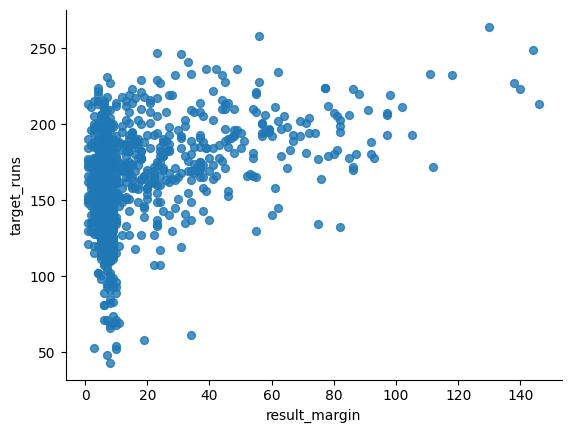

In [470]:
# @title result_margin vs target_runs

from matplotlib import pyplot as plt
ipl_matches.plot(kind='scatter', x='result_margin', y='target_runs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [471]:
ipl_delivery.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [472]:
ipl_matches.shape

(1024, 20)

In [473]:
ipl_delivery.shape

(243817, 17)

In [474]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1024 non-null   int64  
 1   season           1024 non-null   object 
 2   city             973 non-null    object 
 3   date             1024 non-null   object 
 4   match_type       1024 non-null   object 
 5   player_of_match  1019 non-null   object 
 6   venue            1024 non-null   object 
 7   team1            1024 non-null   object 
 8   team2            1024 non-null   object 
 9   toss_winner      1024 non-null   object 
 10  toss_decision    1024 non-null   object 
 11  winner           1019 non-null   object 
 12  result           1024 non-null   object 
 13  result_margin    1005 non-null   float64
 14  target_runs      1021 non-null   float64
 15  target_overs     1021 non-null   float64
 16  super_over       1024 non-null   object 
 17  method        

**Things observed from Match info.**

**Date column** - wrong Datatype. it should be Datetime but it is object

**Season Column** - Wrong Datatype and error in values. it should be int / categorical but it is object.

Additional points that can be done on the dataframe
The Following columns are in object format but it can be converted to Categorical.

**1.City 2.Season 3.Team1 4.Team2 5.Toss_Winner 6Toss_Decision 7.Winner 8.Result 9.Venue**

In [475]:
ipl_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          243817 non-null  int64 
 1   inning            243817 non-null  int64 
 2   batting_team      243817 non-null  object
 3   bowling_team      243817 non-null  object
 4   over              243817 non-null  int64 
 5   ball              243817 non-null  int64 
 6   batter            243817 non-null  object
 7   bowler            243817 non-null  object
 8   non_striker       243817 non-null  object
 9   batsman_runs      243817 non-null  int64 
 10  extra_runs        243817 non-null  int64 
 11  total_runs        243817 non-null  int64 
 12  extras_type       13059 non-null   object
 13  is_wicket         243817 non-null  int64 
 14  player_dismissed  12067 non-null   object
 15  dismissal_kind    12067 non-null   object
 16  fielder           8663 non-null    obj


**Things observed from the deliveries.**
All the columns appear to be in correct Datatype format.
Additional Things that can be done on dataframe Following is the list of column in int64 / object. we can convert them into Categorical columns

**1.Innings 2.Over 3.Ball 4.batsman_runs 5.Extras_type 6.is_wicket 7.dismissal_kind**


# **2.1 Data Cleaning**



# **2.1.1 Checking for null values**


**2.1.1.1 Handling Missing Values (Match Dataset)**

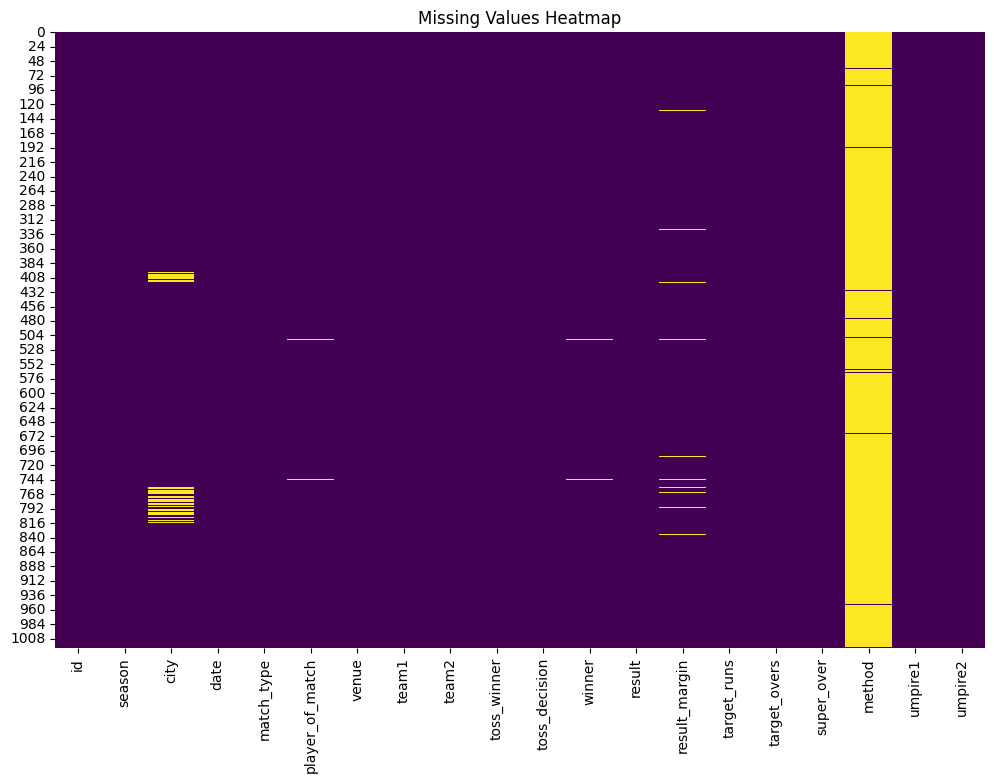

In [476]:
# Assuming data is your IPL DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(ipl_matches.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [477]:
ipl_matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1003
umpire1               0
umpire2               0
dtype: int64

**city:** This column has **51** missing values. We can fill these missing values with 'Unknown' but I decided to analyze the data in excel aftwer looking at data I found That The city where we have nan values, then staiums are Dubai International Cricket Stadium - Dubai
Sharjah Cricket Stadium - Sharjahso we will fill it whit respect to the **venue.**

**player_of_match**, **winner:** These columns have **5** missing values each. These can be left as is or filled with 'Unknown' for simplicity, but after analysis the data I found that if there is no winner then the match doesn't played between the teams and no player of the match exits, so **I decided to delete these five rows.**

**result_margin:** This column has **19** missing values. Since result margin is important, after analysis I found that the match has **Tied** between the teams, **So we can fill missing values with 0.**

**target_runs**, **target_overs:** These columns have **3** missing values each. It might be due to incomplete matches or no results. **Fill these with 0.** but when** I delete the Plyer of the match the it will be deleted because these** are related with them

**method:** This column has **1003** missing values. Since this is not relevant for most analyses, **we can drop this column.**

In [478]:
#Replacing the City with respect to the Venue
for index, row in ipl_matches.iterrows():
  if row['venue'] == 'Dubai International Cricket Stadium':
    ipl_matches.at[index, 'city'] = 'Dubai'
  elif row['venue'] == 'Sharjah Cricket Stadium':
    ipl_matches.at[index,'city'] = 'Sharjah'

In [479]:
#Drop rows with null 'winner', player of the match and target runs and target overs
ipl_matches = ipl_matches.dropna(subset=['winner'])

In [480]:
ipl_matches['result_margin'] = ipl_matches['result_margin'].fillna(0)


C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\1408875645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_matches['result_margin'] = ipl_matches['result_margin'].fillna(0)


In [481]:
# Drop 'method' column as it has too many missing values
ipl_matches.drop(columns=['method'], inplace=True)

C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\4259621233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_matches.drop(columns=['method'], inplace=True)


In [482]:
ipl_matches[ipl_matches['target_overs'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2


In [483]:
ipl_matches.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

**2.1.1.2 Handling Missing Values (Delivery Dataset)**

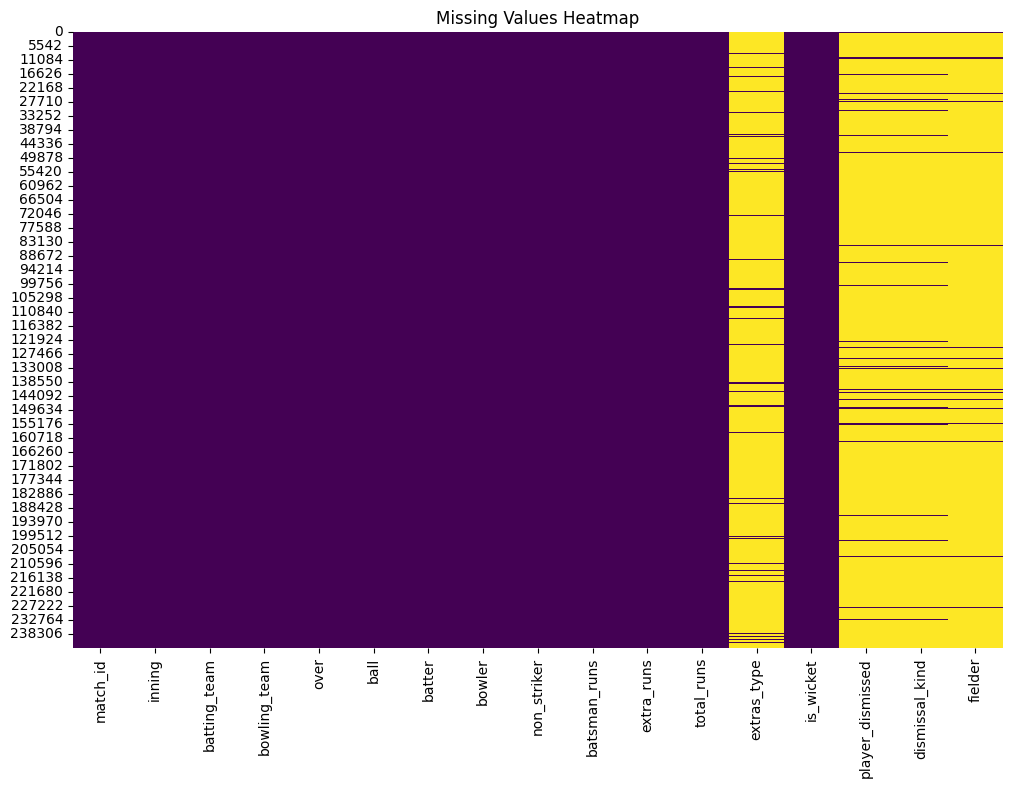

In [484]:
# Assuming data is your IPL DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(ipl_delivery.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [485]:
ipl_delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         230758
is_wicket                0
player_dismissed    231750
dismissal_kind      231750
fielder             235154
dtype: int64


**extras_type, player_dismissed, dismissal_kind, fielder:** These columns have many missing values because they are relevant only when specific events occur. We can fill these with **'None'**.

In [486]:
# extra_type
ipl_delivery['extras_type'].unique()

array(['legbyes', nan, 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [487]:
# Fill 'extras_type', 'player_dismissed', 'dismissal_kind', and 'fielder' with 'None' where they are missing
ipl_delivery['extras_type'] = ipl_delivery['extras_type'].fillna('None')
ipl_delivery['player_dismissed'] = ipl_delivery['player_dismissed'].fillna('None')
ipl_delivery['dismissal_kind'] = ipl_delivery['dismissal_kind'].fillna('None')
ipl_delivery['fielder'] = ipl_delivery['fielder'].fillna('None')

# Verify the changes
ipl_delivery.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

# **2.2 Handeling Duplicates and Searching for anomalies in data**

**2.2.1 Matche data Set**

In [488]:
ipl_matches.duplicated().sum()

0

In [489]:
ipl_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'umpire1', 'umpire2'],
      dtype='object')

In [490]:
ipl_matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [491]:
ipl_matches['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

There is a team repreated Twice.

Rising Pune Supergiants - Rising Pune Supergiant
Teams name has been replaced

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [492]:
# Changing the Names.
team_names = {'Rising Pune Supergiant':'Rising Pune Supergiants','Delhi Daredevils':'Delhi Capitals','Kings XI Punjab':'Punjab Kings'}


In [493]:
ipl_matches['team1'] = ipl_matches['team1'].replace(team_names)

ipl_matches['team2'] = ipl_matches['team2'].replace(team_names)

C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\2529665272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_matches['team1'] = ipl_matches['team1'].replace(team_names)
C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\2529665272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_matches['team2'] = ipl_matches['team2'].replace(team_names)


In [494]:
ipl_matches['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers', 'Punjab Kings',
       'Delhi Capitals', 'Mumbai Indians', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [495]:
ipl_matches['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

**The Following values are Duplicate**

Wankhede Stadium - Wankhede Stadium, Mumbai

Brabourne Stadium - Brabourne Stadium, Mumbai

Eden Gardens - Eden Gardens, Kolkata

Arun Jaitley Stadium - Arun Jaitley Stadium, Delhi

Punjab Cricket Association IS Bindra Stadium - Punjab Cricket Association IS Bindra Stadium, Mohali

Maharashtra Cricket Association Stadium - Maharashtra Cricket Association Stadium, Pune

Rajiv Gandhi International Stadium - Rajiv Gandhi International Stadium, Uppal

Dr DY Patil Sports Academy - Dr DY Patil Sports Academy, Mumbai

MA Chidambaram Stadium - MA Chidambaram Stadium, Chepauk -MA Chidambaram Stadium, Chepauk, Chennail

Arun Jaitley Stadium - Arun Jaitley Stadium, Delhi

Zayed Cricket Stadium, Abu Dhabi - Sheikh Zayed Stadium

In [496]:
venue_dict = {'Wankhede Stadium, Mumbai':'Wankhede Stadium','Brabourne Stadium, Mumbai':'Brabourne Stadium',
              'Eden Gardens, Kolkata':'Eden Gardens','Arun Jaitley Stadium, Delhi':'Arun Jaitley Stadium',
              'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium',
              'Maharashtra Cricket Association Stadium, Pune':'Maharashtra Cricket Association Stadium',
              'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium','Dr DY Patil Sports Academy, Mumbai':
              'Dr DY Patil Sports Academy','Arun Jaitley Stadium, Delhi':'Arun Jaitley Stadium','Zayed Cricket Stadium, Abu Dhabi':
              'Sheikh Zayed Stadium','MA Chidambaram Stadium, Chepauk':'MA Chidambaram Stadium','MA Chidambaram Stadium, Chepauk, Chennail':
              'MA Chidambaram Stadium','Narendra Modi Stadium, Ahmedabad':'Narendra Modi Stadium'}

ipl_matches['venue'] = ipl_matches['venue'].replace(venue_dict)

C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\586381611.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_matches['venue'] = ipl_matches['venue'].replace(venue_dict)


In [497]:
ipl_matches['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

**There is a team repreated Twice.**

Rising Pune Supergiants - Rising Pune Supergiant

**Teams name has been replaced**

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [498]:
ipl_matches['toss_winner'] = ipl_matches['toss_winner'].replace(team_names)

C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\1049046909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_matches['toss_winner'] = ipl_matches['toss_winner'].replace(team_names)


In [499]:
ipl_matches['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

**There is a team repreated Twice.** Rising Pune Supergiants - Rising Pune Supergiant

**Teams name has been replaced**

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [500]:
ipl_matches['winner'] = ipl_matches['winner'].replace(team_names)

C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\1693657986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_matches['winner'] = ipl_matches['winner'].replace(team_names)


In [501]:
ipl_delivery.duplicated().sum()

0

**Resolving the Error in data 2009/02 to 2009**

In [502]:
# Remove '/' and digits after '/' in 'season' column
ipl_matches['season'] = ipl_matches['season'].apply(lambda x: x.split('/')[0] if '/' in x else x)

# Print the result
ipl_matches['season'].unique()

C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\3713342941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_matches['season'] = ipl_matches['season'].apply(lambda x: x.split('/')[0] if '/' in x else x)


array(['2007', '2009', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

# **2.3 Data Transfermation**

**Matches Data Set**

date: Should be converted **from object to datetime**.

**The following Should be converted from object to categorical:**

season, match_type, player_of_match, venue, team1, team2, toss_winner, toss_decision, winner, result, super_over, umpire1, umpire2


In [503]:
# Convert 'date' to datetime
ipl_matches['date'] = pd.to_datetime(ipl_matches['date'])

# Convert columns to categorical type
categorical_columns_matches = ['season','city', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'super_over', 'umpire1', 'umpire2']
ipl_matches[categorical_columns_matches] = ipl_matches[categorical_columns_matches].astype('category')

# Verify the changes
print(ipl_matches.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1019 entries, 0 to 1023
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1019 non-null   int64         
 1   season           1019 non-null   category      
 2   city             1019 non-null   category      
 3   date             1019 non-null   datetime64[ns]
 4   match_type       1019 non-null   category      
 5   player_of_match  1019 non-null   category      
 6   venue            1019 non-null   category      
 7   team1            1019 non-null   category      
 8   team2            1019 non-null   category      
 9   toss_winner      1019 non-null   category      
 10  toss_decision    1019 non-null   category      
 11  winner           1019 non-null   category      
 12  result           1019 non-null   category      
 13  result_margin    1019 non-null   float64       
 14  target_runs      1019 non-null   float64     

C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\1019434115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_matches['date'] = pd.to_datetime(ipl_matches['date'])
C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\1019434115.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_matches[categorical_columns_matches] = ipl_matches[categorical_columns_matches].astype('category')


**Delivery Data Set**

**The following Should be converted from object to categorical:**

extras_type, player_dismissed, dismissal_kind, fielder

In [504]:
# Convert columns in df_ipl_delivery to categorical type
categorical_columns_delivery = ['extras_type', 'player_dismissed', 'dismissal_kind', 'fielder']
ipl_delivery[categorical_columns_delivery] = ipl_delivery[categorical_columns_delivery].astype('category')

# Verify the changes
print(ipl_delivery.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   match_id          243817 non-null  int64   
 1   inning            243817 non-null  int64   
 2   batting_team      243817 non-null  object  
 3   bowling_team      243817 non-null  object  
 4   over              243817 non-null  int64   
 5   ball              243817 non-null  int64   
 6   batter            243817 non-null  object  
 7   bowler            243817 non-null  object  
 8   non_striker       243817 non-null  object  
 9   batsman_runs      243817 non-null  int64   
 10  extra_runs        243817 non-null  int64   
 11  total_runs        243817 non-null  int64   
 12  extras_type       243817 non-null  category
 13  is_wicket         243817 non-null  int64   
 14  player_dismissed  243817 non-null  category
 15  dismissal_kind    243817 non-null  category
 16  fi

# **2.4 Encoding of Variables**


**Matches Data Set**

**1.Teams** (team1, team2, toss_winner, winner):


*   **One-Hot Encoding:** Since these are nominal categorical variables,one-hot encoding is suitable. This will create separate binary columns for each team.


**2.Venue and City** (venue, city):


*   **One-Hot Encoding:** These are also nominal categorical variables. One-hot encoding is suitable to avoid introducing any artificial ordering.



**3.Player of the Match** (player_of_match):

*  **Target Encoding:** Since there are many unique players (high cardinality), target encoding can be used. This replaces each player's name with the mean number of times they have won the Player of the Match award.

**4.Season (season):**

* **Label Encoding:** If treating seasons as ordinal makes sense (e.g., the performance trend over the years), label encoding can be used.

**5.Toss Decision** (toss_decision):

* **Label Encoding:** Since this feature has only two possible values (bat or field), label encoding is straightforward and efficient.

In [505]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1019 entries, 0 to 1023
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1019 non-null   int64         
 1   season           1019 non-null   category      
 2   city             1019 non-null   category      
 3   date             1019 non-null   datetime64[ns]
 4   match_type       1019 non-null   category      
 5   player_of_match  1019 non-null   category      
 6   venue            1019 non-null   category      
 7   team1            1019 non-null   category      
 8   team2            1019 non-null   category      
 9   toss_winner      1019 non-null   category      
 10  toss_decision    1019 non-null   category      
 11  winner           1019 non-null   category      
 12  result           1019 non-null   category      
 13  result_margin    1019 non-null   float64       
 14  target_runs      1019 non-null   float64     

# One-Hot Encoding for teams and venue
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')

teams_venues_encoded = one_hot_encoder.fit_transform(ipl_matches[['team1', 'team2', 'venue','city','toss_winner','winner']])
teams_venues_encoded_df = pd.DataFrame(teams_venues_encoded, columns=one_hot_encoder.get_feature_names_out(['team1', 'team2', 'venue','city','toss_winner','winner']))

Print the encoded DataFrame
print(teams_venues_encoded_df.head())

# Label Encoding with Column Transformer

class LabelEncoderPipelineFriendly(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.le = LabelEncoder()
    
    def fit(self, X, y=None):
        self.le.fit(X)
        return self
    
    def transform(self, X):
        return self.le.transform(X).reshape(-1, 1)

# Columns to encode in both dataframes
matches_columns_to_encode = ['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'player_of_match', 'venue', 'result', 'umpire1', 'umpire2']
delivery_columns_to_encode = ['batting_team', 'bowling_team', 'batter', 'bowler', 'non_striker', 'extras_type', 'player_dismissed', 'dismissal_kind', 'fielder']

# Create column transformers for both dataframes
matches_transformer = ColumnTransformer(
    transformers=[(col, LabelEncoderPipelineFriendly(), [col]) for col in matches_columns_to_encode],
    remainder='passthrough'
)

delivery_transformer = ColumnTransformer(
    transformers=[(col, LabelEncoderPipelineFriendly(), [col]) for col in delivery_columns_to_encode],
    remainder='passthrough'
)

# Create pipelines for both dataframes
matches_pipeline = Pipeline(steps=[('transformer', matches_transformer)])
delivery_pipeline = Pipeline(steps=[('transformer', delivery_transformer)])

# Fit and transform the dataframes
ipl_matches_encoded = matches_pipeline.fit_transform(ipl_matches)
ipl_delivery_encoded = delivery_pipeline.fit_transform(ipl_delivery)

# Convert back to DataFrame with proper column names
ipl_matches_encoded_df = pd.DataFrame(ipl_matches_encoded, columns=matches_columns_to_encode + [col for col in ipl_matches.columns if col not in matches_columns_to_encode])
ipl_delivery_encoded_df = pd.DataFrame(ipl_delivery_encoded, columns=delivery_columns_to_encode + [col for col in ipl_delivery.columns if col not in delivery_columns_to_encode])


print("Encoded IPL Matches DataFrame:")
print(ipl_matches_encoded_df.head())

print("\nEncoded IPL Delivery DataFrame:")
print(ipl_delivery_encoded_df.head())



In [506]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns in df_ipl_matches
ipl_matches['season'] = le.fit_transform(ipl_matches['season'])
ipl_matches['city'] = le.fit_transform(ipl_matches['city'])
ipl_matches['team1'] = le.fit_transform(ipl_matches['team1'])
ipl_matches['team2'] = le.fit_transform(ipl_matches['team2'])
ipl_matches['toss_winner'] = le.fit_transform(ipl_matches['toss_winner'])
ipl_matches['toss_decision'] = le.fit_transform(ipl_matches['toss_decision'])
ipl_matches['winner'] = le.fit_transform(ipl_matches['winner'])
ipl_matches['player_of_match'] = le.fit_transform(ipl_matches['player_of_match'])
ipl_matches['venue'] = le.fit_transform(ipl_matches['venue'])
ipl_matches['result'] = le.fit_transform(ipl_matches['result'])
ipl_matches['umpire1'] = le.fit_transform(ipl_matches['umpire1'])
ipl_matches['umpire2'] = le.fit_transform(ipl_matches['umpire2'])

# Encode categorical columns in df_ipl_delivery
le = LabelEncoder()
ipl_delivery['batting_team'] = le.fit_transform(ipl_delivery['batting_team'])
ipl_delivery['bowling_team'] = le.fit_transform(ipl_delivery['bowling_team'])
ipl_delivery['batter'] = le.fit_transform(ipl_delivery['batter'])
ipl_delivery['bowler'] = le.fit_transform(ipl_delivery['bowler'])
ipl_delivery['non_striker'] = le.fit_transform(ipl_delivery['non_striker'])
ipl_delivery['extras_type'] = le.fit_transform(ipl_delivery['extras_type'])
ipl_delivery['player_dismissed'] = le.fit_transform(ipl_delivery['player_dismissed'])
ipl_delivery['dismissal_kind'] = le.fit_transform(ipl_delivery['dismissal_kind'])
ipl_delivery['fielder'] = le.fit_transform(ipl_delivery['fielder'])

C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\410312542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_matches['season'] = le.fit_transform(ipl_matches['season'])
C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\410312542.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_matches['city'] = le.fit_transform(ipl_matches['city'])
C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\410312542.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

# **2.5 Feature Engineering**

**2.4.1.   Creating New Features for ipl_matches**


1.   Home Team: Whether a team is playing at their home ground.
2.   Win by Runs or Wickets: Separate result_margin into two columns: win_by_runs and win_by_wickets.
3.  Match Day: Extract day of the week from the date column.
4.  Total Matches Played: Cumulative count of matches played by each team till that point in time.




In [507]:
#Creating  a total Runs Feature
total_score_df = ipl_delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
#We Need Only the First Inning Total Runs
total_score_df = total_score_df[total_score_df['inning'] == 1]
#Merging the Total Run Feature to The Data Set
match_df = ipl_matches.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [508]:
# we should pickup those fields which are required for predection and Merge it with the Delivery Data Set
match_df = match_df[['match_id','city','winner','total_runs']]
#Merge both Data sets
delivery_df = match_df.merge(ipl_delivery,on='match_id')
#we Need only Second Innings Data
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [509]:
delivery_df.dtypes

match_id            int64
city                int32
winner              int32
total_runs_x        int64
inning              int64
batting_team        int32
bowling_team        int32
over                int64
ball                int64
batter              int32
bowler              int32
non_striker         int32
batsman_runs        int64
extra_runs          int64
total_runs_y        int64
extras_type         int32
is_wicket           int64
player_dismissed    int32
dismissal_kind      int32
fielder             int32
dtype: object

In [510]:
delivery_df.total_runs_y.isnull().sum()

0

In [511]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,2,6,222,2,16,8,0,1,434,21,605,1,0,1,0,0,370,0,354
125,335982,2,6,222,2,16,8,0,2,614,21,430,0,1,1,5,0,370,0,354
126,335982,2,6,222,2,16,8,0,3,614,21,430,0,0,0,0,0,370,0,354
127,335982,2,6,222,2,16,8,0,4,614,21,430,1,0,1,0,0,370,0,354
128,335982,2,6,222,2,16,8,0,5,434,21,605,1,0,1,0,0,370,0,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243322,1370353,1,0,214,2,0,5,14,2,489,277,443,1,0,1,0,0,370,0,354
243323,1370353,1,0,214,2,0,5,14,3,448,277,484,1,0,1,0,0,370,0,354
243324,1370353,1,0,214,2,0,5,14,4,489,277,443,1,0,1,0,0,370,0,354
243325,1370353,1,0,214,2,0,5,14,5,448,277,484,6,0,6,0,0,370,0,354


In [512]:
delivery_df['total_runs_y'].fillna(0, inplace=True)


C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\1018674920.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  delivery_df['total_runs_y'].fillna(0, inplace=True)


In [513]:
#Current Score Ball by Ball
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

In [514]:
#Remaining Runs
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [515]:
#Remaining Balls
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [516]:
#Wickets On hand
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets

In [517]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [518]:
#Required Run Rate
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [519]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [520]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [521]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [522]:
final_df = final_df.sample(final_df.shape[0])

In [461]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
242514,5,0,8,169,120,4,172,inf,8.45,0


In [523]:
final_df.dropna(inplace=True)

In [525]:
final_df = final_df[final_df['balls_left'] != 0]

In [526]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117469 entries, 79616 to 14610
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   batting_team  117469 non-null  int32  
 1   bowling_team  117469 non-null  int32  
 2   city          117469 non-null  int32  
 3   runs_left     117469 non-null  int64  
 4   balls_left    117469 non-null  int64  
 5   wickets       117469 non-null  int32  
 6   total_runs_x  117469 non-null  int64  
 7   crr           117469 non-null  float64
 8   rrr           117469 non-null  float64
 9   result        117469 non-null  int64  
dtypes: float64(2), int32(4), int64(4)
memory usage: 8.1 MB


# **2.5 Data Visualization**

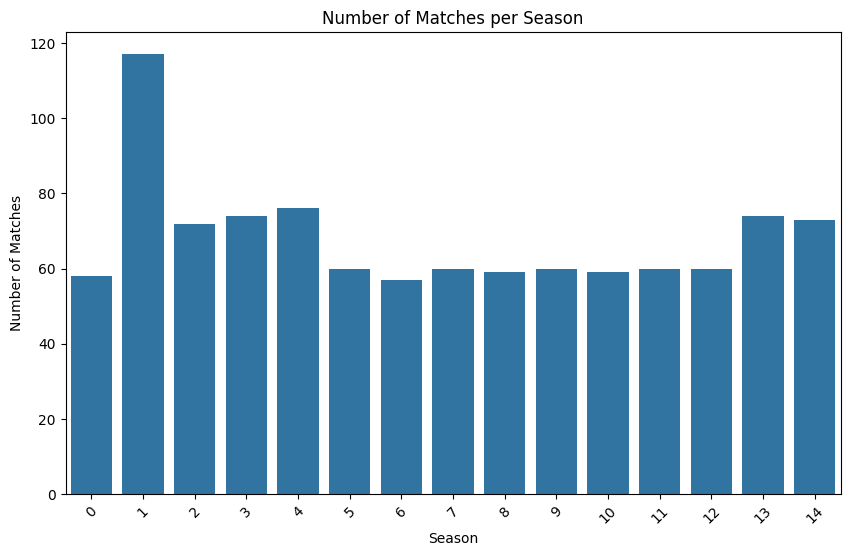

In [427]:
# Number of Matches per Season
plt.figure(figsize=(10, 6))
sns.countplot(data=ipl_matches, x='season')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


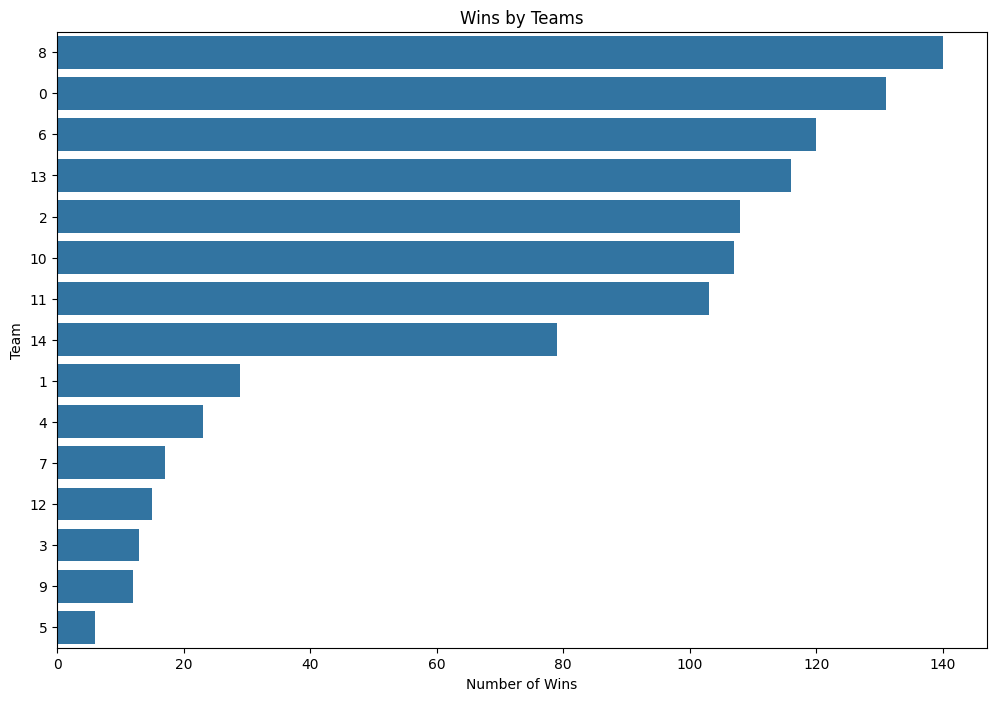

In [428]:
# Wins by Teams
plt.figure(figsize=(12, 8))
sns.countplot(data=ipl_matches, y='winner', order=ipl_matches['winner'].value_counts().index)
plt.title('Wins by Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.show()

C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\1211028609.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wickets', y='bowler', data=bowler_wickets, palette='viridis')


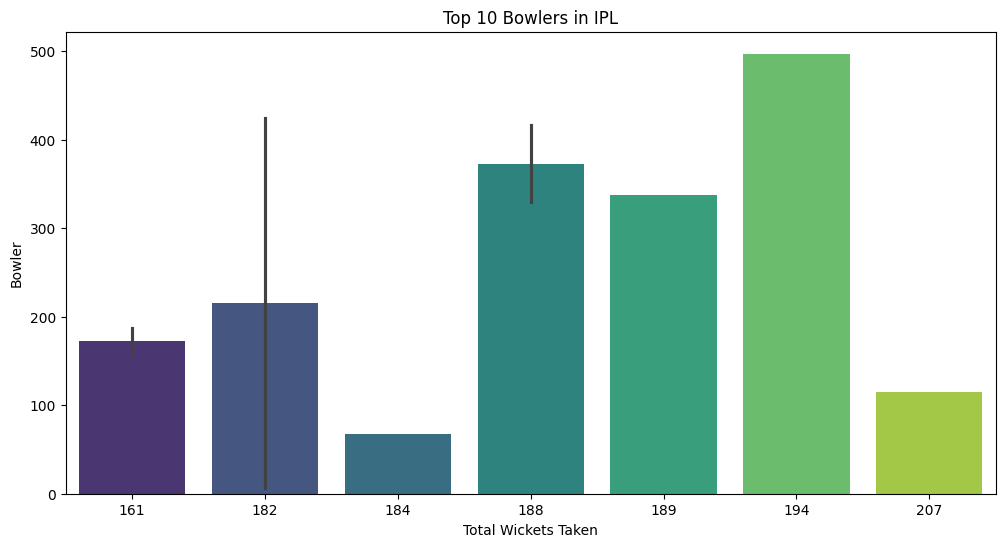

In [429]:
# Filter data for deliveries that resulted in a wicket
wickets = ipl_delivery[ipl_delivery['is_wicket'] == 1]

# Calculate total wickets taken by each bowler
bowler_wickets = wickets.groupby('bowler').size().reset_index(name='wickets')
bowler_wickets = bowler_wickets.sort_values(by='wickets', ascending=False).head(10)

# Plot top 10 bowlers
plt.figure(figsize=(12, 6))
sns.barplot(x='wickets', y='bowler', data=bowler_wickets, palette='viridis')
plt.title('Top 10 Bowlers in IPL')
plt.xlabel('Total Wickets Taken')
plt.ylabel('Bowler')
plt.show()


C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\137824373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wickets', y='bowler', data=bowler_wickets, palette='viridis')


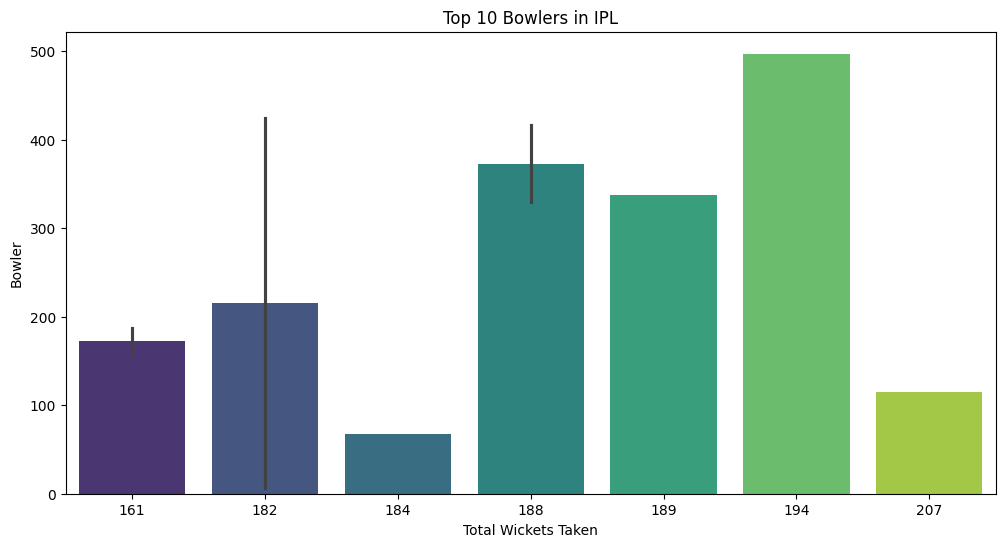

In [430]:
# Filter data for deliveries that resulted in a wicket
wickets = ipl_delivery[ipl_delivery['is_wicket'] == 1]

# Calculate total wickets taken by each bowler
bowler_wickets = wickets.groupby('bowler').size().reset_index(name='wickets')
bowler_wickets = bowler_wickets.sort_values(by='wickets', ascending=False).head(10)
bowler_wickets
# Plot top 10 bowlers
plt.figure(figsize=(12, 6))
sns.barplot(x='wickets', y='bowler', data=bowler_wickets, palette='viridis')
plt.title('Top 10 Bowlers in IPL')
plt.xlabel('Total Wickets Taken')
plt.ylabel('Bowler')
plt.show()


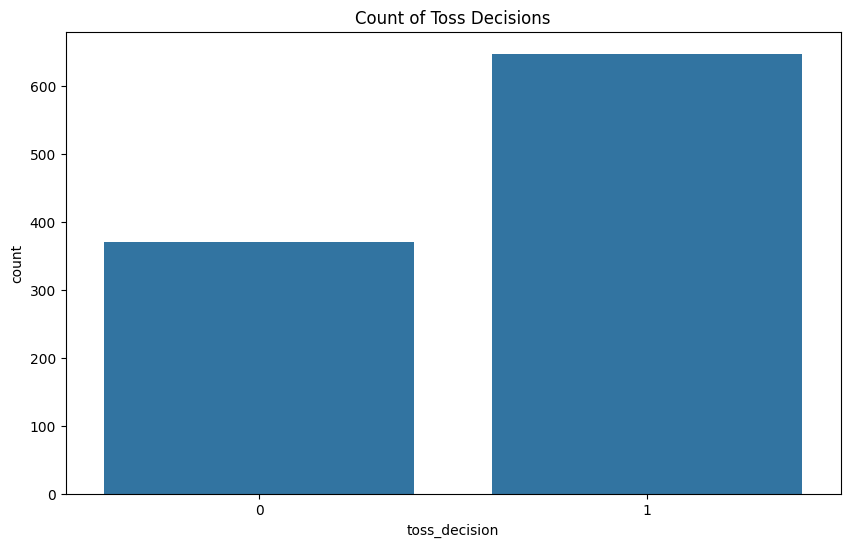

In [431]:
# Bar chart for toss decisions
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_decision', data=ipl_matches)
plt.title('Count of Toss Decisions')
plt.show()

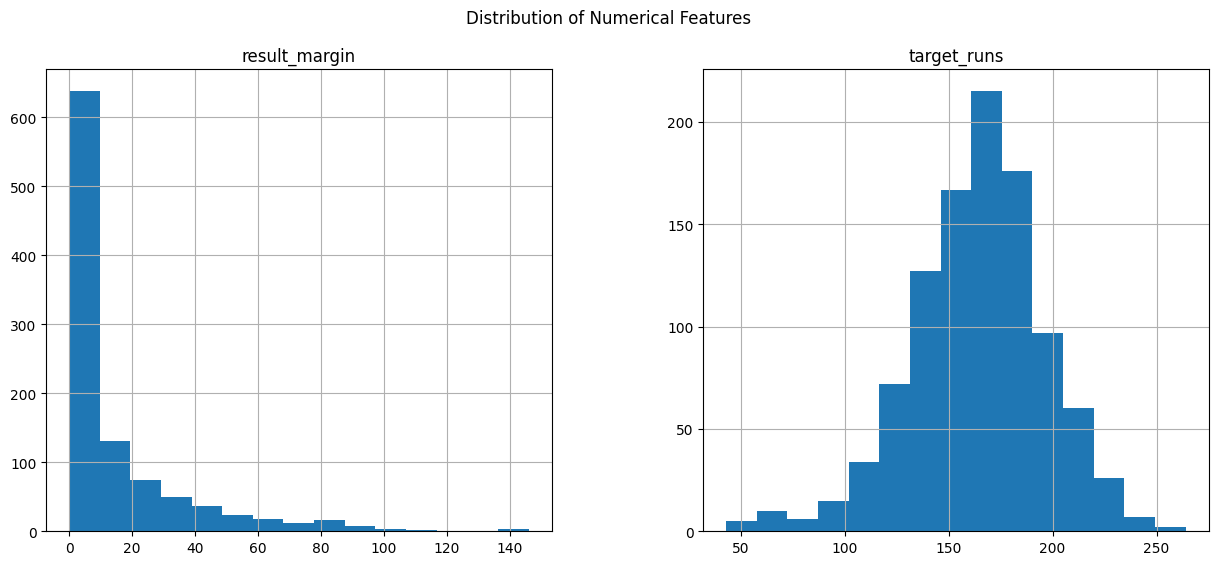

In [432]:
# Plotting histograms for numerical features
numerical_features = ['result_margin', 'target_runs']
ipl_matches[numerical_features].hist(bins=15, figsize=(15, 6), layout=(1, 2))
plt.suptitle('Distribution of Numerical Features')
plt.show()

C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_42232\4164251049.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman_runs', y='batter', data=batsman_runs, palette='viridis')


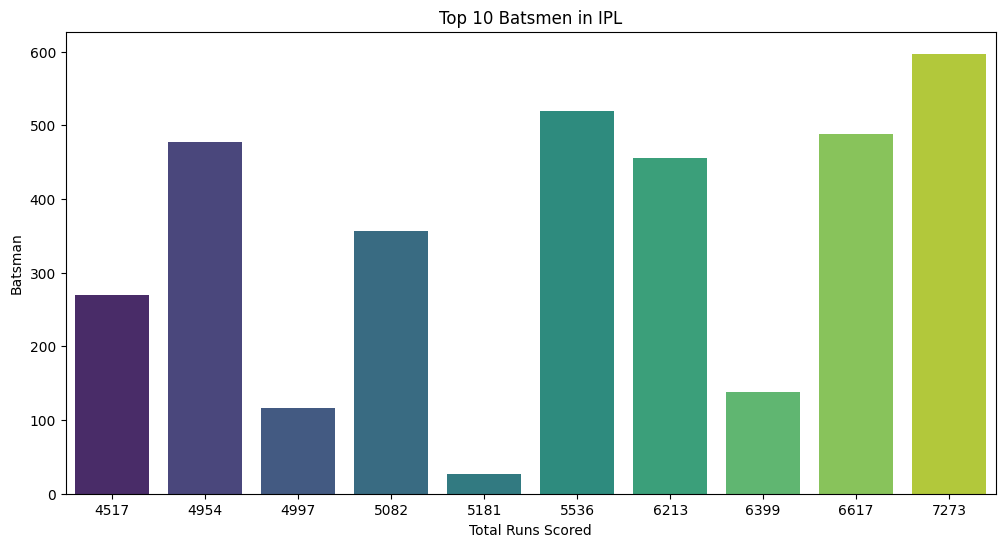

In [433]:
# Calculate total runs scored by each batsman
batsman_runs = ipl_delivery.groupby('batter')['batsman_runs'].sum().reset_index()
batsman_runs = batsman_runs.sort_values(by='batsman_runs', ascending=False).head(10)

# Plot top 10 batsmen
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman_runs', y='batter', data=batsman_runs, palette='viridis')
plt.title('Top 10 Batsmen in IPL')
plt.xlabel('Total Runs Scored')
plt.ylabel('Batsman')
plt.show()

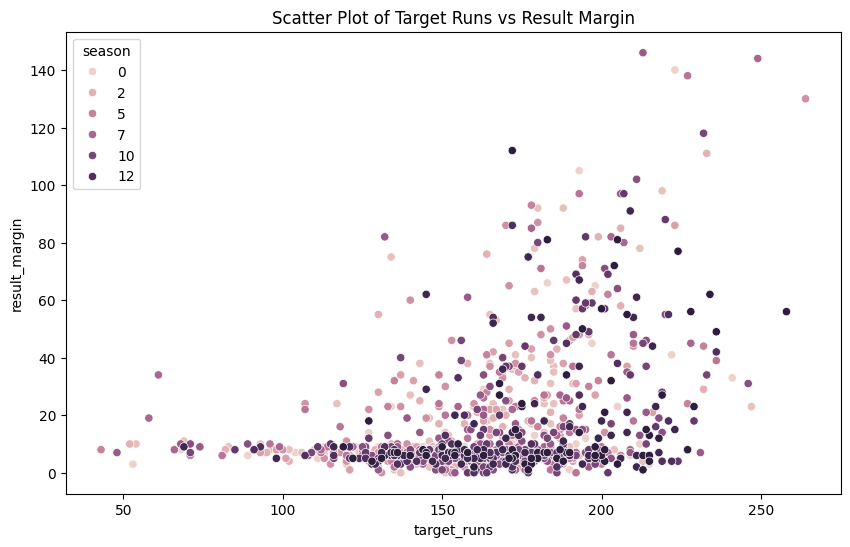

In [434]:
# Scatter plot to explore the relationship between result_margin and target_runs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ipl_matches, x='target_runs', y='result_margin', hue='season')
plt.title('Scatter Plot of Target Runs vs Result Margin')
plt.show()

<Axes: xlabel='over'>

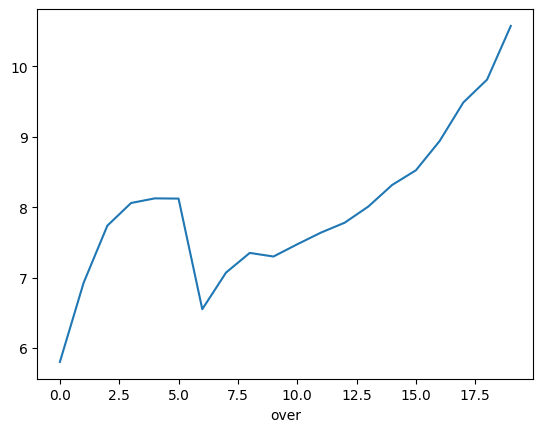

In [435]:
# Average runs in an over (All seasons combined)
(ipl_delivery.groupby('over')['total_runs'].mean()*6).plot(kind = 'line')

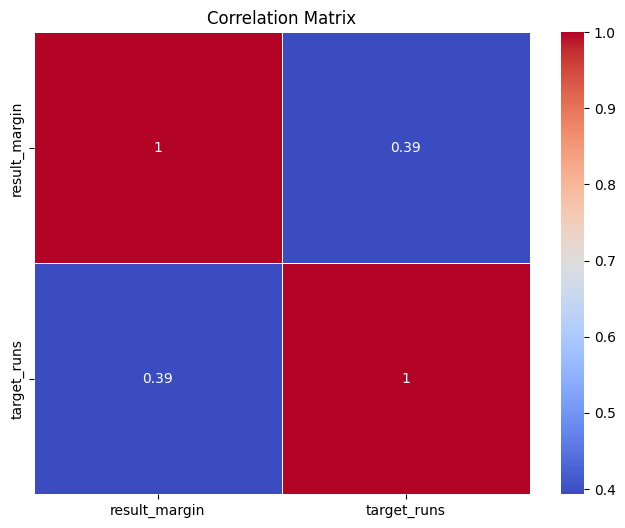

In [436]:
# Compute the correlation matrix
correlation_matrix = ipl_matches[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


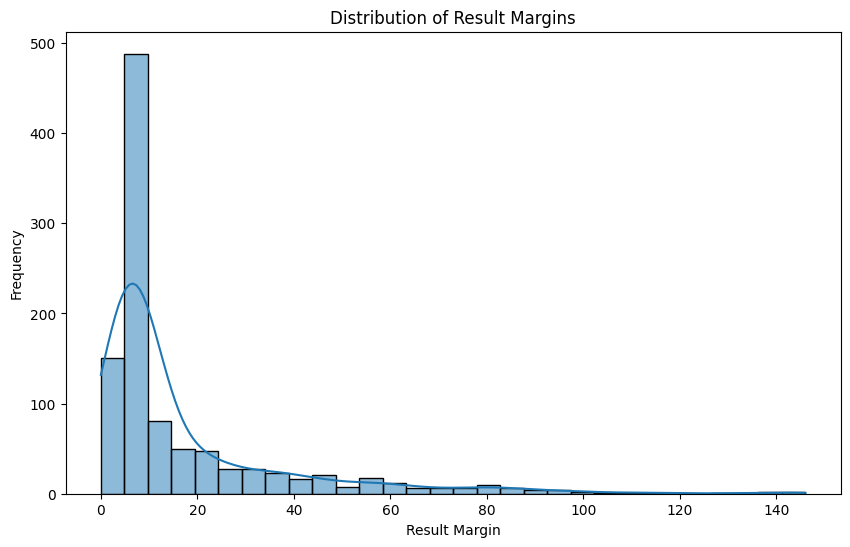

In [437]:
# Distribution of Result Margins
plt.figure(figsize=(10, 6))
sns.histplot(data=ipl_matches, x='result_margin', bins=30, kde=True)
plt.title('Distribution of Result Margins')
plt.xlabel('Result Margin')
plt.ylabel('Frequency')
plt.show()

# **3 Model Building**

**Predicting Match Winner:**

Based on pre-match information
For this task, we'll use the df_ipl_matches dataset. We'll build a classification model to predict the winner of a match using pre-match information.

**Features to Use:**

* Season
* City
* Venue
* Team1
* Team2
* Toss Winner
* Toss Decision
* Match Type

**Target:**

* Winner

**Preprocessing:**
Encode categorical variables
Split data into training and testing sets

In [438]:
# Select features and target
features = ['season', 'city', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'match_type']
target = 'winner'

# Filter out matches with no result
df_ipl_matches_filtered = ipl_matches[ipl_matches['winner'] != 'No Result']

# Encode categorical variables
le = LabelEncoder()
df_ipl_matches_encoded = df_ipl_matches_filtered.copy()
for col in features + [target]:
    df_ipl_matches_encoded[col] = le.fit_transform(df_ipl_matches_filtered[col])

# Split data into training and testing sets
X = df_ipl_matches_encoded[features]
y = df_ipl_matches_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the splits
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(815, 8) (204, 8)
(815,) (204,)


Now, let's build and evaluate a simple classification model using Random Forest.

In [439]:
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.78      0.71        23
           1       0.40      0.67      0.50         3
           2       0.52      0.65      0.58        20
           3       0.67      0.29      0.40         7
           4       0.50      0.22      0.31         9
           5       0.00      0.00      0.00         1
           6       0.53      0.58      0.55        31
           7       1.00      0.50      0.67         2
           8       0.52      0.50      0.51        28
           9       0.00      0.00      0.00         2
          10       0.35      0.30      0.32        20
          11       0.37      0.35      0.36        20
          12       0.50      0.50      0.50         2
          13       0.55      0.52      0.53        23
          14       0.41      0.54      0.47        13

    accuracy                           0.50       204
   macro avg       0.46      0.43      0.

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [440]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['sqrt', 'log2', 5, 10],
    'max_depth': [None, 10, 20, 30, 50]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data (X_train and y_train are your training features and labels)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.2f}")


c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 60 candidates, totalling 600 fits


KeyboardInterrupt: 

**5.2 Predicting Runs Scored in an Over**
For this task, we'll use the df_ipl_delivery dataset. We'll build a regression model to predict the total runs scored in an over based on deliveries data.

**Features to Use:**

* Match ID
* Inning
* Batting Team
* Bowling Team
* Over
* Ball
* Batter
* Bowler

**Target:**

Total Runs (runs_in_over)

**Preprocessing:**

* Encode categorical variables
* Aggregate data to get runs scored in each over
* Split data into training and testing sets

In [ ]:
# Aggregate to get total runs scored in each over
df_runs_per_over = ipl_delivery.groupby(['match_id', 'inning', 'batting_team', 'bowling_team', 'over']).agg({'runs_in_over': 'sum'}).reset_index()

# Select features and target
features = ['match_id', 'inning', 'batting_team', 'bowling_team', 'over']
target = 'runs_in_over'

# Encode categorical variables
df_runs_per_over_encoded = df_runs_per_over.copy()
for col in features:
    if df_runs_per_over_encoded[col].dtype == 'object':
        df_runs_per_over_encoded[col] = le.fit_transform(df_runs_per_over_encoded[col])

# Split data into training and testing sets
X = df_runs_per_over_encoded[features]
y = df_runs_per_over_encoded[target]

X_trainD, X_testD, y_trainD, y_testD = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the splits
print(X_trainD.shape, X_testD.shape)
print(y_trainD.shape, y_testD.shape)


(31577, 5) (7895, 5)
(31577,) (7895,)


Now, let's build and evaluate a simple regression model using Random Forest.

In [ ]:
# Initialize and train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_trainD, y_trainD)

# Make predictions
y_predD = rf_regressor.predict(X_testD)

# Evaluate the model
mae = mean_absolute_error(y_testD, y_predD)
mse = mean_squared_error(y_testD, y_predD)
rmse = mse ** 0.5

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Mean Absolute Error: 33.63
Mean Squared Error: 1911.65
Root Mean Squared Error: 43.72


**Reasoning:**

**1.Random Forest for Classification:** Random Forest is a robust model for classification tasks and works well with categorical features.

**2.Random Forest for Regression:** Similarly, Random Forest is effective for regression tasks and handles non-linear relationships well.

These models should give you a good starting point. You can further tune the hyperparameters, try other algorithms, and perform cross-validation to improve performance.

#**4 Model Evaluation and Hyperparameter Tuning**
To improve the performance of our models, we need to evaluate them thoroughly and tune their hyperparameters. We'll start with the Random Forest model for predicting match winners and then move to the regression model for predicting runs scored in an over.

6.1 Evaluating and Tuning the Classification Model (Match Winner Prediction)
Current Performance:

* Accuracy
* Classification Report

Next Steps:

**Cross-Validation:** Use cross-validation to get a more robust estimate of the model's performance.

**Hyperparameter Tuning:** Use GridSearchCV to find the best hyperparameters for the Random Forest model.

**Cross-Validation:**

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.00367321 0.01203293 0.01216114 0.01190778 0.00342032]
Mean Cross-Validation Accuracy: 0.01


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights to handle class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Initialize the RandomForestClassifier with class weights
rf = RandomForestClassifier(class_weight=class_weights_dict)

# Define the refined grid of hyperparameters
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_features': [4, 5, 6],
    'max_depth': [8, 10, 12]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.2f}")


Fitting 10 folds for each of 27 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Best Parameters: {'max_depth': 8, 'max_features': 4, 'n_estimators': 1500}
Best Score: 0.47


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Initialize the RandomForestClassifier with class weights
rf = RandomForestClassifier(class_weight=class_weights_dict)

# Define the grid of hyperparameters including additional parameters
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_features': [4, 5, 6],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.2f}")

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Classification Report:\n", report)


Fitting 10 folds for each of 486 candidates, totalling 4860 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


**Hyperparameter Tuning**

In [ ]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [500, 1000],
    'max_features': ['sqrt', 'log2', 5, 10],
    'max_depth': [None, 10, 20, 30, 50]
}

# Set up the grid search
# Use n_jobs=1 to disable parallelism and prevent memory issues
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=1, verbose=2)

# Fit the grid search to the data (X_train and y_train are your training features and labels)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.2f}")

Fitting 10 folds for each of 40 candidates, totalling 400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   2.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, n_estimators=1000; total time=   2.6s
[CV] END max_depth=None, max_features=sqrt, n_estimators=1000; total time=   2.6s
[CV] END max_depth=None, m

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.06


**Evaluating the Tuned Model**

In [ ]:
# Use the best estimator from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)

print(f"Tuned Model Accuracy: {accuracy_tuned:.2f}")
print("Tuned Model Classification Report:\n", report_tuned)


Tuned Model Accuracy: 0.06
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00        31
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          18      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**6.2 Evaluating and Tuning the Regression Model (Runs Prediction)
Current Performance:**

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)

**Next Steps:**

**Cross-Validation:** Use cross-validation to get a more robust estimate of the model's performance.

**Hyperparameter Tuning:** Use GridSearchCV to find the best hyperparameters for the Random Forest regressor.

**Cross-Validation:**

In [ ]:
# Perform 5-fold cross-validation
cv_scores_reg = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_absolute_error')

print(f"Cross-Validation MAE Scores: {-cv_scores_reg}")
print(f"Mean Cross-Validation MAE: {-cv_scores_reg.mean():.2f}")


Cross-Validation MAE Scores: [37.58654592 34.94910956 37.39657715 38.01015835 39.13053078]
Mean Cross-Validation MAE: 37.41


**Hyperparameter Tuning:**

**Evaluating the Tuned Regressor**

In [ ]:
# Use the best estimator from the grid search
best_rf_regressor = grid_search_reg.best_estimator_

# Make predictions
y_pred_reg_tuned = best_rf_regressor.predict(X_test)

# Evaluate the model
mae_tuned = mean_absolute_error(y_test, y_pred_reg_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_reg_tuned)
rmse_tuned = mse_tuned ** 0.5

print(f"Tuned Model MAE: {mae_tuned:.2f}")
print(f"Tuned Model MSE: {mse_tuned:.2f}")
print(f"Tuned Model RMSE: {rmse_tuned:.2f}")


Tuned Model MAE: 33.13
Tuned Model MSE: 1863.11
Tuned Model RMSE: 43.16


**Reasoning**:
* Cross-Validation: Provides a more robust estimate of model performance by averaging results from multiple folds.
* GridSearchCV: Helps find the best combination of hyperparameters to optimize model performance.
* Evaluation: Post-tuning evaluation helps compare the tuned model with the initial model to verify improvements.

These steps will enhance your models and provide more reliable predictions. If you need further refinements or specific analyses, let me know how you'd like to proceed!

# **5 Model Interpretation and Feature Importance**
After tuning the models, it is essential to interpret the results and understand the feature importance. This step helps in identifying the key factors that influence the predictions and provides insights into the data.

**7.1 Feature Importance for Classification Model**

For the Random Forest classification model, we can use the feature importance scores to understand which features contribute most to predicting the match winner.

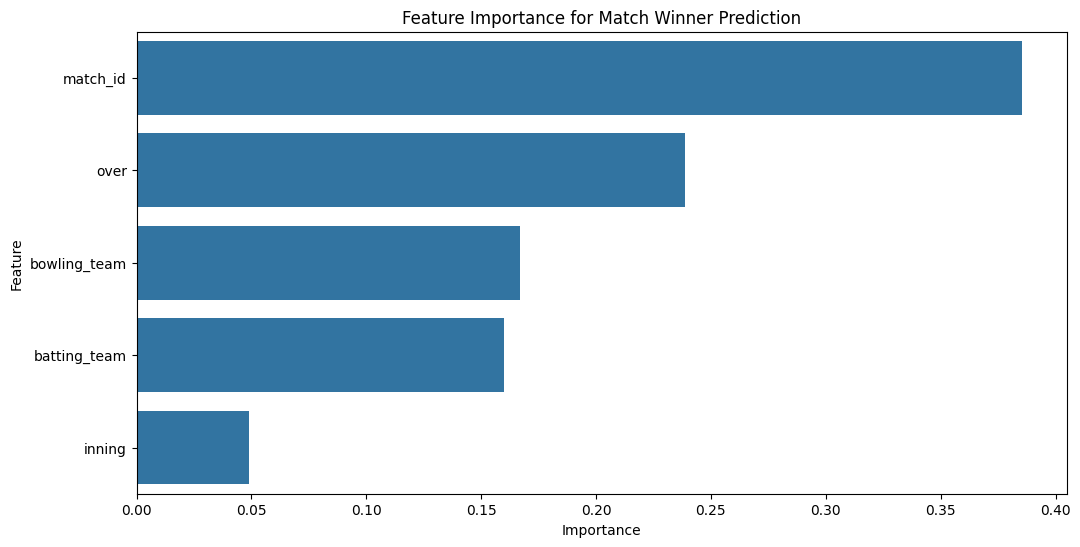

In [ ]:
# Get feature importances from the best model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Match Winner Prediction')
plt.show()


**7.2 Feature Importance for Regression Model**

Similarly, for the Random Forest regression model, we can examine the feature importance scores to identify the key factors that influence the total runs scored in an over.